In [14]:
#Import required libraries
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
"""initialise the constants"""

prediction_days = 13
features = ["High", "Low", "Open", "Close"]
start_date, end_date = "2012-1-1", "2020-1-1"
training_ratio = 0.9

In [16]:
"""import the data"""
df = web.data.DataReader("GE", "yahoo", start_date, end_date)

In [17]:
#split the data into training and testing dataset
length = len(df)
print(length)
train_size = int((0.9*length))
test_size = length-train_size
train_df, test_df = df.iloc[0:train_size], df.iloc[train_size:length]
print(train_df.tail(), test_df.head())

2012
                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2019-03-08  77.440002  74.239998  74.639999  76.639999  10939838.0  75.631073
2019-03-11  80.160004  74.639999  75.599998  79.199997  13256300.0  78.157356
2019-03-12  81.120003  77.279999  79.440002  78.080002  12421188.0  77.052109
2019-03-13  80.400002  77.599998  77.839996  80.160004   9270563.0  79.104729
2019-03-14  84.000000  81.599998  82.400002  82.400002  16733850.0  81.315239                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2019-03-15  83.599998  79.199997  82.320000  79.680000  23649263.0  78.631035
2019-03-18  82.480003  79.760002  79.919998  81.599998  11455938.0  80.525757
2019-03-19  82.720001  81.120003  81.760002  81.519997   6835113.0  80.446808
2019-03-20  82.639999  80.959999  81.040001  81.760002   60

In [18]:
#preparing data for RNN regression



#reshaping to be a column for the scaler function
train_df = train_df["Close"].values.reshape(-1,1)

#scaling data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_df)
print(scaled_data.shape)

length_scaled_data = len(scaled_data)


x_train = []
y_train = []

for i in range(prediction_days, length_scaled_data):
  x_train.append(scaled_data[i-prediction_days:i, 0])
  y_train.append(scaled_data[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


(1810, 1)


In [24]:
#Building the model
model = Sequential()

model.add(LSTM(512, return_sequences=False, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(Dense(128, activation=relu))
model.add(Dense(1, activation=relu))

model.compile(
    optimizer= "adam",
    loss= "mean_squared_error",
    
)

model.fit(x_train,y_train, epochs=16, batch_size=32) 

Epoch 1/16
57/57 [==============================] - 2s 6ms/step - loss: 0.0221
Epoch 2/16
57/57 [==============================] - 0s 5ms/step - loss: 9.7496e-04
Epoch 3/16
57/57 [==============================] - 0s 5ms/step - loss: 8.2421e-04
Epoch 4/16
57/57 [==============================] - 0s 5ms/step - loss: 7.6942e-04
Epoch 5/16
57/57 [==============================] - 0s 5ms/step - loss: 7.8904e-04
Epoch 6/16
57/57 [==============================] - 0s 5ms/step - loss: 6.6904e-04
Epoch 7/16
57/57 [==============================] - 0s 5ms/step - loss: 7.5771e-04
Epoch 8/16
57/57 [==============================] - 0s 5ms/step - loss: 6.0942e-04
Epoch 9/16
57/57 [==============================] - 0s 5ms/step - loss: 6.0921e-04
Epoch 10/16
57/57 [==============================] - 0s 5ms/step - loss: 5.6337e-04
Epoch 11/16
57/57 [==============================] - 0s 5ms/step - loss: 6.3893e-04
Epoch 12/16
57/57 [==============================] - 0s 5ms/step - loss: 5.9699e-04
Epoch

In [25]:
#preparing the test data for prediction
scaled_test_data = scaler.fit_transform(test_df["Close"].values.reshape(-1,1))
print(scaled_test_data.shape)
length_scaled_data = len(scaled_test_data)

x_test = []
actual_closing_values = []

for i in range(prediction_days, length_scaled_data):

  x_test.append(scaled_test_data[i-prediction_days:i, 0])
  actual_closing_values.append(scaled_test_data[i,0])

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


predictions = model.predict(x_test)

prediction_values =scaler.inverse_transform(predictions)

(202, 1)


In [26]:
#preparing the data for validation
actual_closing_values = np.array(actual_closing_values)
actual_closing_values =actual_closing_values.reshape(-1,1)
actual_closing_values =scaler.inverse_transform(actual_closing_values)

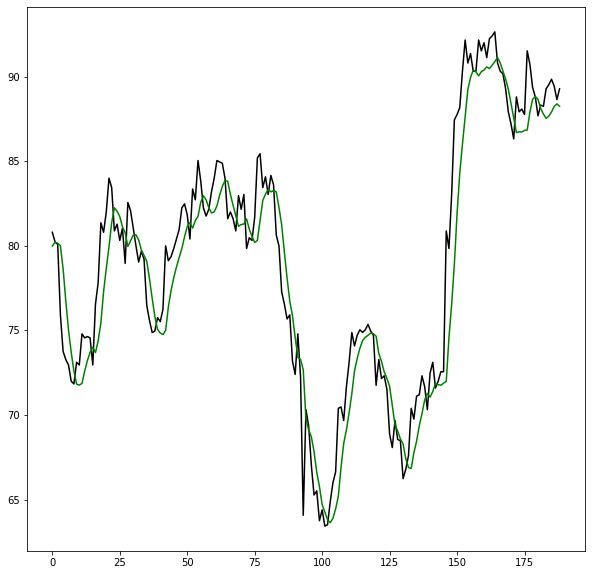

In [27]:
plt.figure(figsize=(10, 10))
plt.plot(actual_closing_values, color="black", label="Actual closing prices")
plt.plot(prediction_values, color="green", label="Predcited closing prices")
plt.show()